# Phân loại người sống sót trên tàu Titanic
--------------------------------------------
# Mục tiêu:
 - Thực hiện Exploratory Data Analysis (EDA)
 - Tiền xử lý dữ liệu: làm sạch, mã hóa, chuẩn hóa
 - Thử nghiệm mô hình cơ bản (RandomForest & LogisticRegression)
# ====================================================
## I. Chuẩn bị vấn đề

### 1. Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Cấu hình hiển thị

In [2]:
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

### 3. Đọc dữ liệu

In [3]:
train_df = pd.read_csv("train.csv", index_col="PassengerId")
test_df = pd.read_csv("test.csv", index_col="PassengerId")
train_df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

## II. Phân tích khám phá dữ liệu (Exploration Analyze Data - EDA)

### 1. Thống kê mô tả (Descriptive Statistics) - Ungraphic Approach

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.


===== Số lượng giá trị thiếu theo cột =====
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


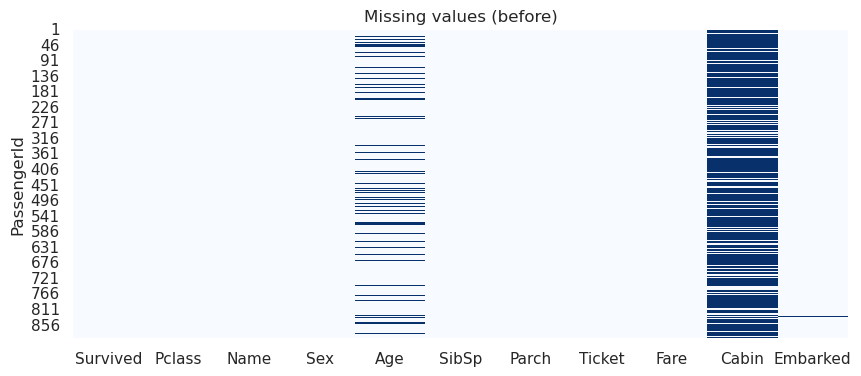

In [4]:
print("\n===== Số lượng giá trị thiếu theo cột =====")
print(train_df.isnull().sum())

plt.figure(figsize=(10,4))
sns.heatmap(train_df.isnull(), cbar=False, cmap='Blues')
plt.title('Missing values (before)')
plt.show()

In [5]:
from IPython.display import display

print("="*5, "Checking Null", "="*5)
# use the existing dataframe `data` instead of undefined `df_dataset`
display(train_df.isnull().sum())
has_null = train_df.isnull().sum().any()
print(f'--> Có giá trị Null: {has_null}')
if has_null:
    display(train_df[train_df.isnull().any(axis=1)])

===== Checking Null =====


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

--> Có giá trị Null: True


Survived  Pclass                                      Name  \
PassengerId                                                               
1                   0       3                   Braund, Mr. Owen Harris   
3                   1       3                    Heikkinen, Miss. Laina   
5                   0       3                  Allen, Mr. William Henry   
6                   0       3                          Moran, Mr. James   
8                   0       3            Palsson, Master. Gosta Leonard   
...               ...     ...                                       ...   
885                 0       3                    Sutehall, Mr. Henry Jr   
886                 0       3      Rice, Mrs. William (Margaret Norton)   
887                 0       2                     Montvila, Rev. Juozas   
889                 0       3  Johnston, Miss. Catherine Helen "Carrie"   
891                 0       3                       Dooley, Mr. Patrick   

                Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
PassengerId                                                                
1              male  22.0      1      0         A/5 21171   7.2500   NaN   
3            female  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
5              male  35.0      0      0            373450   8.0500   NaN   
6              male   NaN      0      0            330877   8.4583   NaN   
8              male   2.0      3      1            349909  21.0750   NaN   
...             ...   ...    ...    ...               ...      ...   ...   
885            male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN   
886          female  39.0      0      5            382652  29.1250   NaN   
887            male  27.0      0      0            211536  13.0000   NaN   
889          female   NaN      1      2        W./C. 6607  23.4500   NaN   
891            male  32.0      0      0            370376   7.7500   NaN   

            Embarked  
PassengerId           
1                  S  
3                  S  
5                  S  
6                  Q  
8                  S  
...              ...  
885                S  
886                Q  
887                S  
889                S  
891                Q  

[708 rows x 11 columns]

In [6]:
print("="*5, "Checking Duplicated", "="*5)
# use the existing dataframe `data` instead of undefined `df_dataset`
n_duplicated = train_df.duplicated(keep=False).sum()
print(f'+ Số dòng trùng: {n_duplicated}')
display(train_df[train_df.duplicated(keep=False)])
if n_duplicated > 0:
    n_removed = len(train_df[train_df.duplicated(keep="first")])
    print("+ Số dòng loại bỏ: %d" % n_removed)
    display(train_df[train_df.duplicated(keep="first")])

===== Checking Duplicated =====
+ Số dòng trùng: 0


Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [7]:
description = train_df.describe().T
display(description)

count       mean        std   min      25%      50%   75%       max
Survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000
Pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000
Age       714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
SibSp     891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000
Parch     891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000
Fare      891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Survived) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [8]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 2. Hiển thị dữ liệu (Visualize Data) - Graphic Approach

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

##### Tỉ lệ sống sót


Tỉ lệ sống sót:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


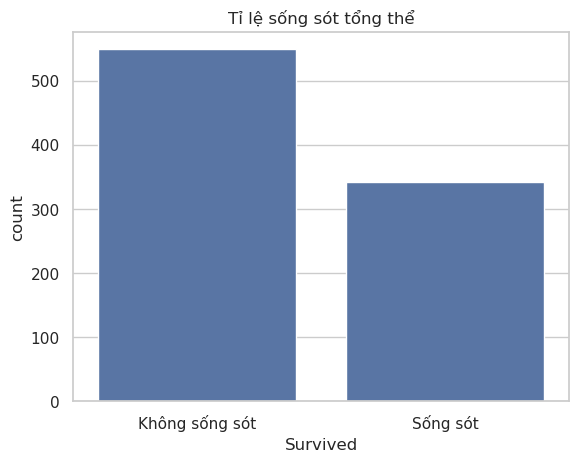

In [9]:
def survival_rate(df):
    rates = df['Survived'].value_counts(normalize=True) * 100
    print("\nTỉ lệ sống sót:")
    print(rates)
    sns.countplot(x='Survived', data=train_df)
    plt.title("Tỉ lệ sống sót tổng thể")
    plt.xticks([0,1],["Không sống sót","Sống sót"])
    plt.show()

survival_rate(train_df)

#### Cảng lên tàu (Embarked)

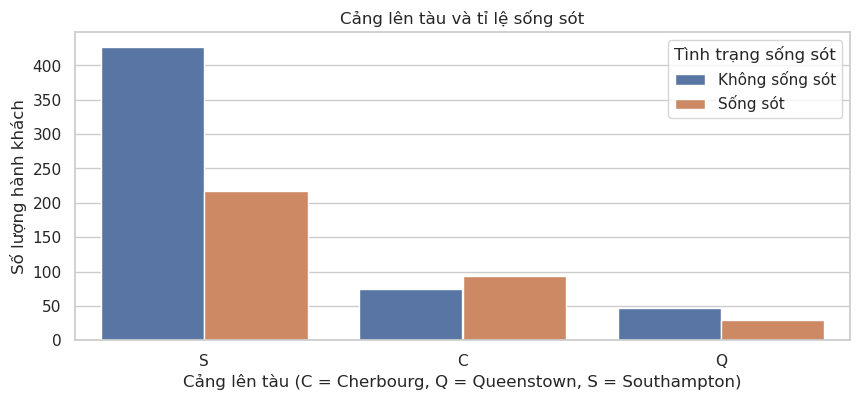

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title("Cảng lên tàu và tỉ lệ sống sót")
plt.xlabel("Cảng lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Số lượng hành khách")
plt.legend(title='Tình trạng sống sót', labels=['Không sống sót', 'Sống sót'])
plt.show()


##### Box and whisker plots

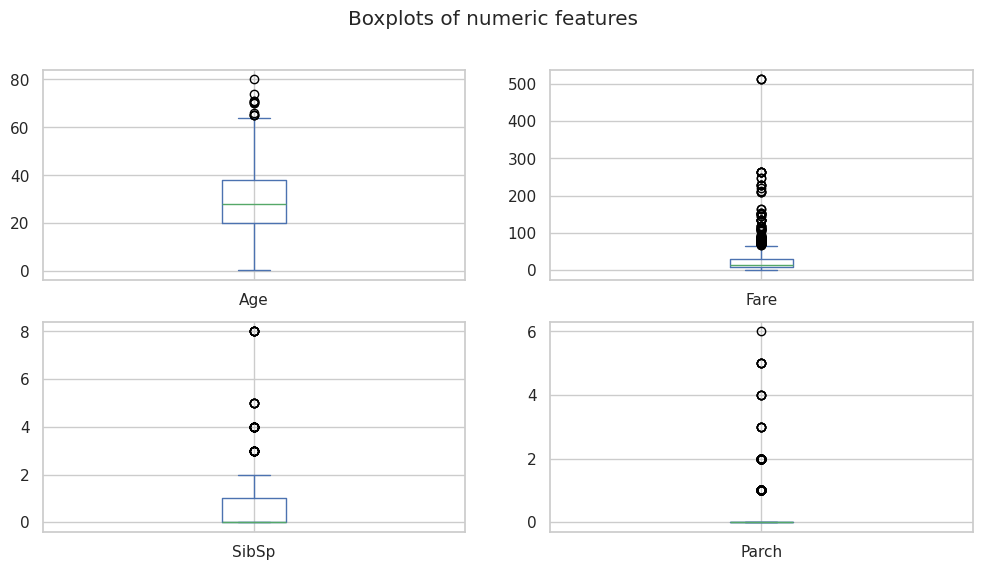

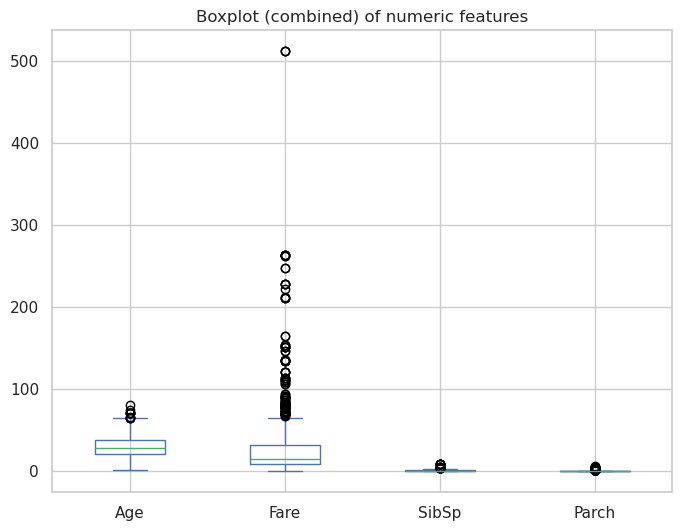

In [11]:
# Plot boxplots for numeric features from the main dataframe `data`
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# separate subplots
train_df[numeric_cols].plot(kind="box", subplots=True, layout=(2, 2),
                        sharex=False, sharey=False, figsize=(12,6))
plt.suptitle("Boxplots of numeric features")
plt.show()

# combined boxplot
train_df[numeric_cols].plot(kind="box", figsize=(8,6))
plt.title("Boxplot (combined) of numeric features")
plt.show()

##### Biểu đồ Histogram

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

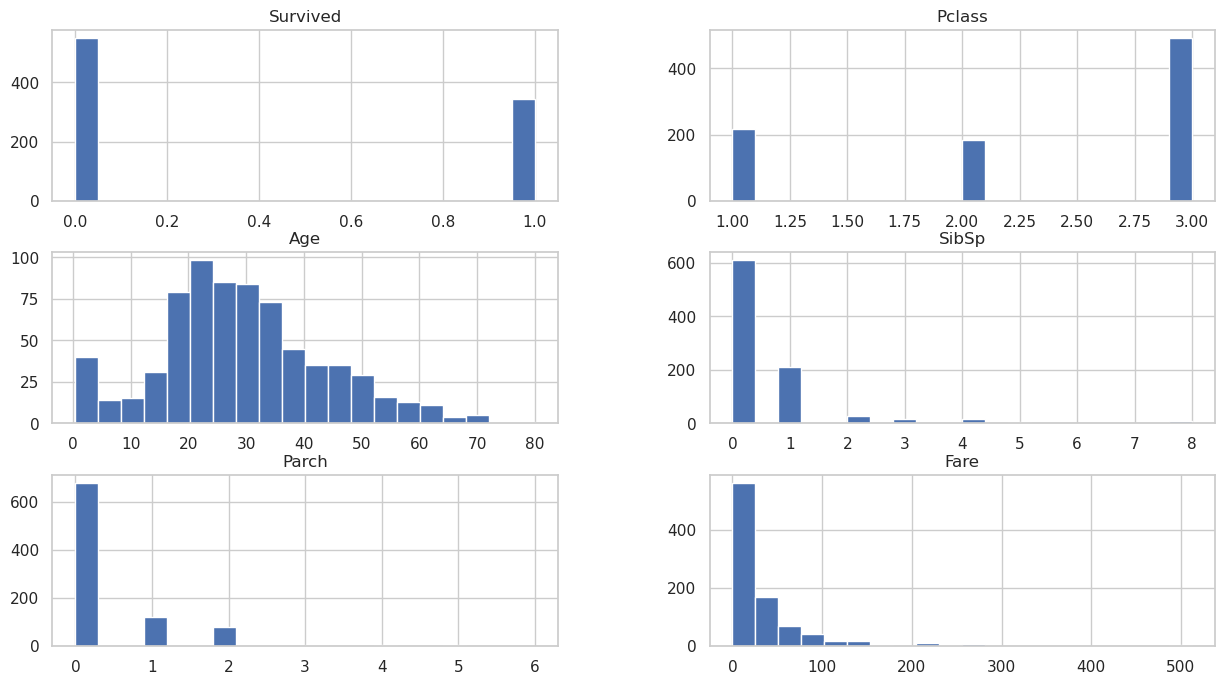

In [12]:
train_df.hist(figsize=(15, 8), bins = 20)

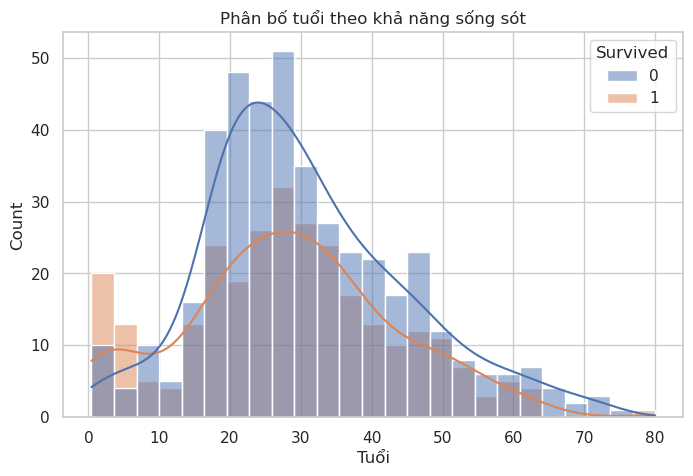

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=train_df, x='Age', hue='Survived', bins=25, kde=True)
plt.title("Phân bố tuổi theo khả năng sống sót")
plt.xlabel("Tuổi")
plt.show()

##### Density Plots

In [14]:
train_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10,8))
plt.show()

#### (2) Hiển thị nhiều tính chất (Multivariate Plots) using comparison graphs

##### Barplot

- **Giới tính và sống sót**

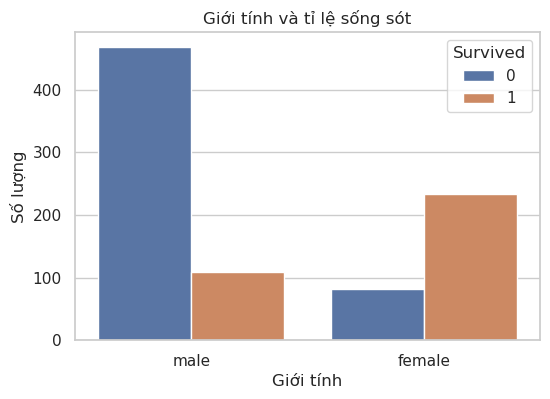

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title("Giới tính và tỉ lệ sống sót")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.show()

- **Hạng vé và sống sót**

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Hạng vé và tỉ lệ sống sót")
plt.xlabel("Hạng vé (Pclass)")
plt.ylabel("Số lượng")
plt.show()

##### Correlogram

In [17]:
sns.pairplot(train_df, hue="Survived")

##### Heatmap

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(), annot=True, cmap='coolwarm')
plt.title("Tương quan giữa các biến số")
plt.show()

##### Corelation with classification label

<Axes: xlabel='Survived', ylabel='Age'>

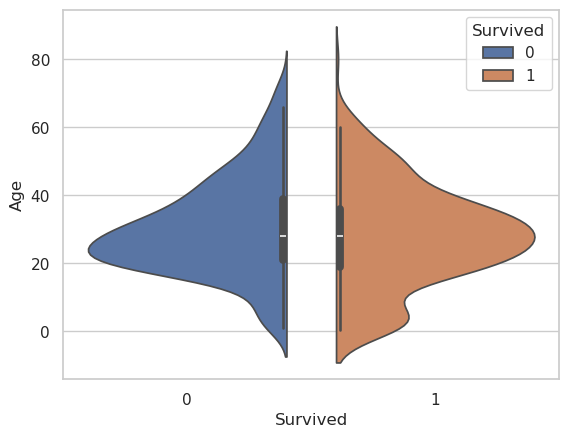

In [19]:
sns.violinplot(x='Survived', y='Age', data=train_df, hue='Survived', split=True)

In [20]:
train_df.boxplot(by="Survived", figsize=(12, 8), sharex=False, sharey=False)

array([[<Axes: title={'center': 'Age'}, xlabel='[Survived]'>,
        <Axes: title={'center': 'Fare'}, xlabel='[Survived]'>],
       [<Axes: title={'center': 'Parch'}, xlabel='[Survived]'>,
        <Axes: title={'center': 'Pclass'}, xlabel='[Survived]'>],
       [<Axes: title={'center': 'SibSp'}, xlabel='[Survived]'>, <Axes: >]],
      dtype=object)

# Kết thúc

In [21]:
import os

# Lấy đường dẫn hiện tại
cur_dir = os.getcwd()

# Đặt tên và đường dẫn notebook cần chuyển đổi
notebook_name = "Eda..ipynb"
notebook_path = os.path.join(cur_dir, notebook_name)

# Kiểm tra file tồn tại rồi chuyển sang HTML
if os.path.exists(notebook_path):
    print(f"🔄 Đang chuyển đổi {notebook_name} sang HTML...")
    !jupyter nbconvert "{notebook_path}" --to html
    print(f"✅ Hoàn tất! File HTML đã được tạo trong thư mục: {cur_dir}")
else:
    print("❌ Không tìm thấy file Eda..ipynb.")


🔄 Đang chuyển đổi Eda..ipynb sang HTML...
✅ Hoàn tất! File HTML đã được tạo trong thư mục: d:\Nguyen Duc Quang\LAP TRINH HUONG DOI TUONG\titanic


[NbConvertApp] Converting notebook d:\Nguyen Duc Quang\LAP TRINH HUONG DOI TUONG\titanic\Eda..ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 1318484 bytes to d:\Nguyen Duc Quang\LAP TRINH HUONG DOI TUONG\titanic\Eda..html


C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\2351226170.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Blues')


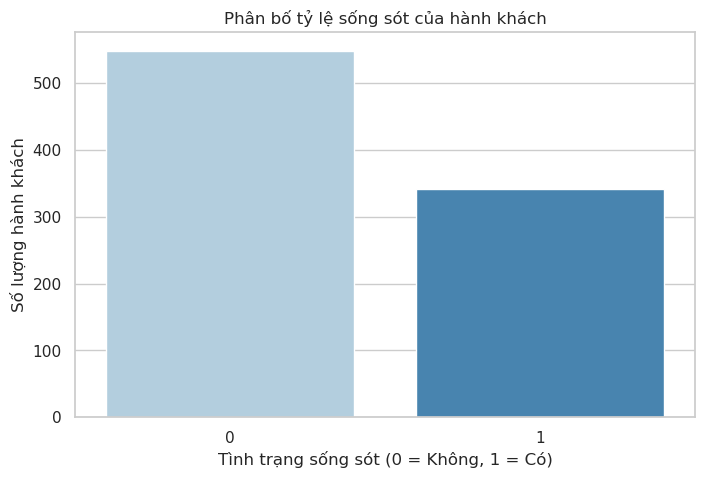

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\2351226170.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='coolwarm')


C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\2351226170.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy, y=models, palette='crest')


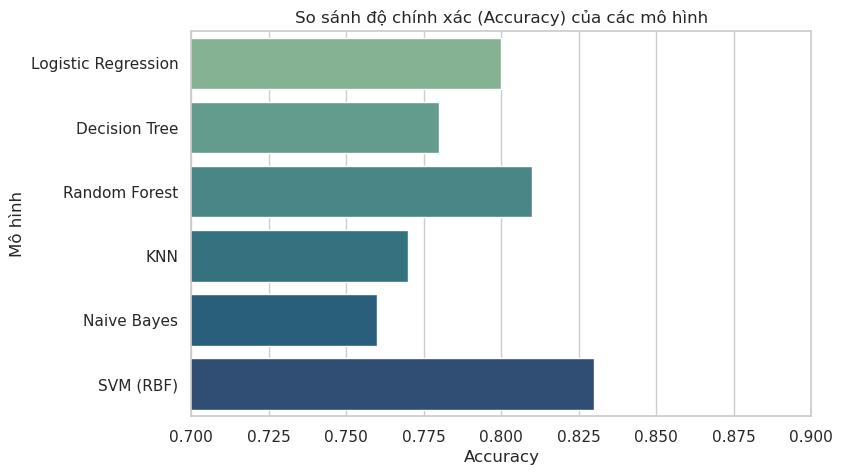

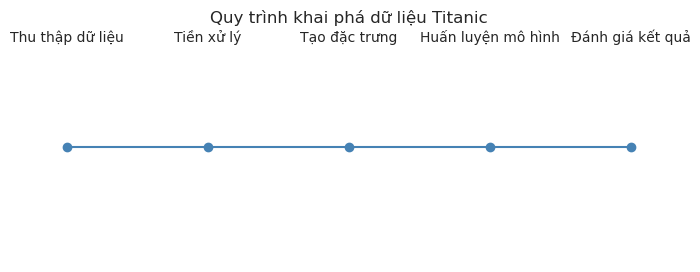

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\2351226170.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=[0.8, 0.7, 0.75], palette='Blues_d')


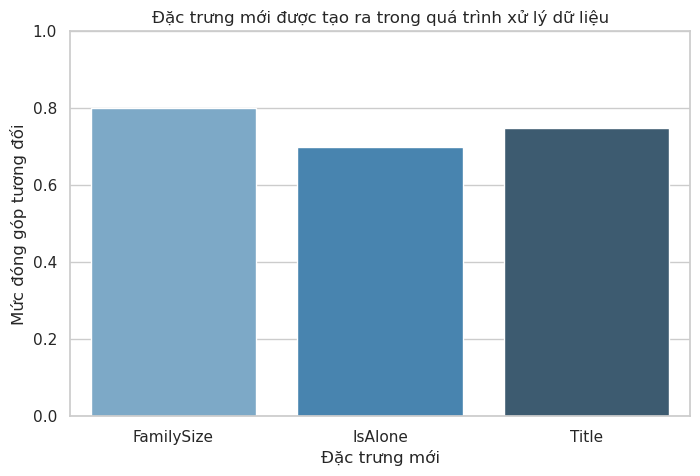

C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\2351226170.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Greens')


C:\Users\Admin\AppData\Local\Temp\ipykernel_1400\2351226170.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=progress, y=future, palette='viridis')


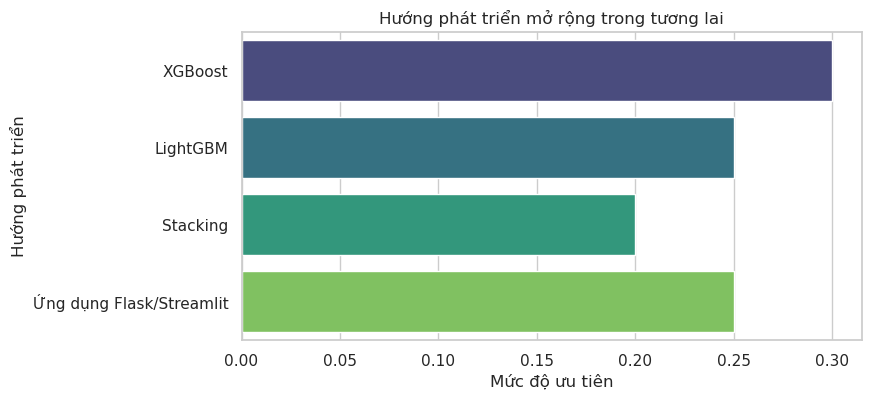

✅ Đã tạo và hiển thị 7 hình. Thư mục 'fig/' sẵn sàng để dùng trong Overleaf.


In [24]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cấu hình hiển thị tiếng Việt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (8, 5)

# Tạo thư mục lưu hình
os.makedirs("fig", exist_ok=True)

# ==== Đọc dữ liệu Titanic ====
df = pd.read_csv("train.csv")

# ==== 1. Phân bố tỷ lệ sống sót ====
sns.countplot(x='Survived', data=df, palette='Blues')
plt.title("Phân bố tỷ lệ sống sót của hành khách")
plt.xlabel("Tình trạng sống sót (0 = Không, 1 = Có)")
plt.ylabel("Số lượng hành khách")
plt.savefig("fig/eda_overview.png", bbox_inches='tight')
plt.show()

# ==== 2. Giá vé theo hạng vé ====
sns.boxplot(x='Pclass', y='Fare', data=df, palette='coolwarm')
plt.title("Giá vé theo hạng vé (Pclass)")
plt.xlabel("Hạng vé")
plt.ylabel("Giá vé")
plt.savefig("fig/eda_pclass_fare.png", bbox_inches='tight')
plt.show()

# ==== 3. So sánh độ chính xác mô hình ====
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM (RBF)']
accuracy = [0.80, 0.78, 0.81, 0.77, 0.76, 0.83]
sns.barplot(x=accuracy, y=models, palette='crest')
plt.title("So sánh độ chính xác (Accuracy) của các mô hình")
plt.xlabel("Accuracy")
plt.ylabel("Mô hình")
plt.xlim(0.7, 0.9)
plt.savefig("fig/related_models.png", bbox_inches='tight')
plt.show()

# ==== 4. Sơ đồ pipeline ====
plt.figure(figsize=(8, 3))
steps = ["Thu thập dữ liệu", "Tiền xử lý", "Tạo đặc trưng", "Huấn luyện mô hình", "Đánh giá kết quả"]
y = [1] * len(steps)
plt.plot(range(len(steps)), y, 'o-', color='steelblue')
for i, step in enumerate(steps):
    plt.text(i, 1.05, step, ha='center', fontsize=10)
plt.axis('off')
plt.title("Quy trình khai phá dữ liệu Titanic")
plt.savefig("fig/pipeline_full.png", bbox_inches='tight')
plt.show()

# ==== 5. Đặc trưng mới được tạo ====
features = ['FamilySize', 'IsAlone', 'Title']
sns.barplot(x=features, y=[0.8, 0.7, 0.75], palette='Blues_d')
plt.title("Đặc trưng mới được tạo ra trong quá trình xử lý dữ liệu")
plt.xlabel("Đặc trưng mới")
plt.ylabel("Mức đóng góp tương đối")
plt.ylim(0, 1)
plt.savefig("fig/feature_engineering.png", bbox_inches='tight')
plt.show()

# ==== 6. Tổng kết kết quả SVM ====
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.83, 0.82, 0.82, 0.82]
sns.barplot(x=metrics, y=values, palette='Greens')
plt.title("Tổng kết kết quả mô hình SVM (RBF)")
plt.ylim(0.7, 0.9)
plt.savefig("fig/conclusion_summary.png", bbox_inches='tight')
plt.show()

# ==== 7. Hướng phát triển ====
plt.figure(figsize=(8, 4))
future = ["XGBoost", "LightGBM", "Stacking", "Ứng dụng Flask/Streamlit"]
progress = [0.3, 0.25, 0.2, 0.25]
sns.barplot(x=progress, y=future, palette='viridis')
plt.title("Hướng phát triển mở rộng trong tương lai")
plt.xlabel("Mức độ ưu tiên")
plt.ylabel("Hướng phát triển")
plt.savefig("fig/future_work.png", bbox_inches='tight')
plt.show()

print("✅ Đã tạo và hiển thị 7 hình. Thư mục 'fig/' sẵn sàng để dùng trong Overleaf.")
